In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x.shape

(654, 15)

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_10degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(588, 100, 100)


In [17]:
print(y_test.shape)

(66, 100, 100)


In [18]:
print(x_train.shape)

(588, 15, 1)


In [19]:
print(x_test.shape)

(66, 15, 1)


In [20]:
theta_train

array([ 720.,  630.,  490.,  760.,  160.,  500.,  410.,  650.,  260.,
        490.,  170.,  740.,  390., 1080.,  540.,   60.,  240.,  920.,
        730.,  610.,   90., 1010.,  270.,  860.,  400.,  530.,  620.,
        120.,   20.,  410., 1010.,  990.,  560.,    0.,  110.,  560.,
         20., 1000.,  230.,  240.,  770.,  840.,  790.,  860.,   10.,
        820.,  110.,  700.,  770.,  890.,  700.,  640.,  250.,  910.,
        260.,  600.,  670.,  390.,  140.,  180.,  780.,  740.,   30.,
        550., 1040., 1030.,  200.,  130.,  290.,  250.,  500.,  950.,
        870.,  480.,  560.,   50.,  380.,  990.,    0.,  670., 1010.,
        680.,  420.,  610.,  940.,  300.,  560., 1040.,   50.,   40.,
        590.,   90.,   70.,  890.,  440.,  730.,  310.,   90.,   10.,
       1010.,  310.,  110.,  430.,  420.,  730.,  580.,  900.,  230.,
        660.,  110.,    0.,  950., 1040., 1030.,  470.,  470.,  680.,
        890.,  660.,  830.,  420., 1020.,  800.,  790.,  230.,  160.,
        170.,  210.,

In [21]:
tsr_train

array([1.6, 1.9, 1.6, 1.9, 1.9, 1.9, 1.7, 1.5, 1.8, 1.5, 1.7, 1.7, 1.5,
       1.7, 1.6, 1.5, 1.6, 1.7, 1.6, 2. , 1.6, 1.7, 1.8, 1.5, 2. , 1.7,
       2. , 1.9, 1.7, 1.5, 1.5, 1.6, 1.5, 1.6, 1.9, 1.7, 1.8, 1.6, 1.6,
       1.5, 2. , 2. , 1.9, 1.7, 1.6, 1.5, 2. , 1.9, 1.5, 1.9, 1.5, 2. ,
       1.8, 1.9, 1.6, 1.5, 2. , 2. , 1.8, 1.5, 2. , 2. , 1.7, 1.8, 1.6,
       1.7, 1.9, 1.8, 1.5, 2. , 1.7, 1.6, 1.7, 2. , 1.6, 1.8, 2. , 1.8,
       1.8, 1.6, 1.8, 2. , 1.7, 1.8, 1.7, 1.7, 2. , 1.5, 1.6, 1.9, 1.9,
       1.7, 1.5, 1.5, 1.9, 2. , 1.9, 1.8, 1.8, 1.6, 1.6, 1.8, 1.5, 1.5,
       1.5, 1.6, 2. , 2. , 1.5, 1.5, 1.7, 1.9, 1.7, 1.9, 1.7, 1.8, 1.6,
       2. , 1.8, 1.5, 2. , 1.7, 1.8, 1.5, 1.5, 1.7, 1.8, 1.9, 1.7, 2. ,
       1.7, 1.8, 1.6, 1.7, 1.7, 2. , 1.9, 1.5, 1.9, 1.8, 1.8, 2. , 1.7,
       1.5, 1.8, 2. , 1.6, 1.6, 1.7, 1.5, 1.9, 1.8, 2. , 1.5, 1.6, 1.9,
       1.6, 1.8, 1.6, 1.5, 2. , 1.5, 1.8, 1.5, 1.9, 1.9, 1.9, 1.6, 1.5,
       1.7, 1.7, 1.7, 1.7, 1.5, 2. , 1.6, 1.9, 1.9, 1.5, 1.7, 1.

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
15/15 [==============================] - 1s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 2/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1025
Epoch 3/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1002
Epoch 4/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0931
Epoch 5/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0858
Epoch 6/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 7/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 8/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 9/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 10/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 11/10000
15/15 [=======

15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0425
Epoch 85/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 86/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 87/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0416
Epoch 88/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 89/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 90/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 91/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 92/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0404
Epoch 93/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 94/10000
15/15 [=============

15/15 [==============================] - 0s 5ms/step - loss: 8.4001e-04 - rmse: 0.0259
Epoch 167/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3341e-04 - rmse: 0.0258
Epoch 168/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2941e-04 - rmse: 0.0257
Epoch 169/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2262e-04 - rmse: 0.0256
Epoch 170/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1559e-04 - rmse: 0.0254
Epoch 171/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0622e-04 - rmse: 0.0253
Epoch 172/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0035e-04 - rmse: 0.0251
Epoch 173/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9260e-04 - rmse: 0.0250
Epoch 174/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8507e-04 - rmse: 0.0248
Epoch 175/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7831e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 4.8975e-04 - rmse: 0.0179
Epoch 246/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8831e-04 - rmse: 0.0179
Epoch 247/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8635e-04 - rmse: 0.0178
Epoch 248/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8322e-04 - rmse: 0.0178
Epoch 249/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8038e-04 - rmse: 0.0177
Epoch 250/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7865e-04 - rmse: 0.0176
Epoch 251/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7619e-04 - rmse: 0.0176
Epoch 252/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7377e-04 - rmse: 0.0175
Epoch 253/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7089e-04 - rmse: 0.0174
Epoch 254/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6806e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 3.5034e-04 - rmse: 0.0136
Epoch 325/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4989e-04 - rmse: 0.0136
Epoch 326/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4921e-04 - rmse: 0.0136
Epoch 327/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4714e-04 - rmse: 0.0135
Epoch 328/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4550e-04 - rmse: 0.0135
Epoch 329/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4376e-04 - rmse: 0.0134
Epoch 330/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4389e-04 - rmse: 0.0134
Epoch 331/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4213e-04 - rmse: 0.0133
Epoch 332/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4061e-04 - rmse: 0.0133
Epoch 333/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.3991e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 2.8247e-04 - rmse: 0.0111
Epoch 404/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.8231e-04 - rmse: 0.0111
Epoch 405/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8179e-04 - rmse: 0.0111
Epoch 406/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8051e-04 - rmse: 0.0110
Epoch 407/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7924e-04 - rmse: 0.0110
Epoch 408/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7968e-04 - rmse: 0.0110
Epoch 409/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7885e-04 - rmse: 0.0109
Epoch 410/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7715e-04 - rmse: 0.0109
Epoch 411/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7760e-04 - rmse: 0.0109
Epoch 412/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7653e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 2.4136e-04 - rmse: 0.0094
Epoch 483/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4174e-04 - rmse: 0.0094
Epoch 484/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.4178e-04 - rmse: 0.0094
Epoch 485/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.4131e-04 - rmse: 0.0094
Epoch 486/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4037e-04 - rmse: 0.0094
Epoch 487/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3977e-04 - rmse: 0.0093
Epoch 488/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3914e-04 - rmse: 0.0093
Epoch 489/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3904e-04 - rmse: 0.0093
Epoch 490/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3850e-04 - rmse: 0.0093
Epoch 491/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3852e-04 -

15/15 [==============================] - 0s 6ms/step - loss: 2.1434e-04 - rmse: 0.0083
Epoch 562/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1346e-04 - rmse: 0.0082
Epoch 563/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1339e-04 - rmse: 0.0082
Epoch 564/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1318e-04 - rmse: 0.0082
Epoch 565/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1395e-04 - rmse: 0.0082
Epoch 566/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1405e-04 - rmse: 0.0083
Epoch 567/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1351e-04 - rmse: 0.0082
Epoch 568/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1235e-04 - rmse: 0.0082
Epoch 569/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1253e-04 - rmse: 0.0082
Epoch 570/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1261e-04 -

15/15 [==============================] - 0s 6ms/step - loss: 1.9453e-04 - rmse: 0.0074
Epoch 641/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9452e-04 - rmse: 0.0074
Epoch 642/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.9450e-04 - rmse: 0.0074
Epoch 643/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9451e-04 - rmse: 0.0074
Epoch 644/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9401e-04 - rmse: 0.0074
Epoch 645/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9391e-04 - rmse: 0.0074
Epoch 646/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9339e-04 - rmse: 0.0074
Epoch 647/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9309e-04 - rmse: 0.0074
Epoch 648/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9278e-04 - rmse: 0.0074
Epoch 649/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.9206e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.7906e-04 - rmse: 0.0068
Epoch 720/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7911e-04 - rmse: 0.0068
Epoch 721/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7894e-04 - rmse: 0.0068
Epoch 722/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7905e-04 - rmse: 0.0068
Epoch 723/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7895e-04 - rmse: 0.0068
Epoch 724/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7958e-04 - rmse: 0.0069
Epoch 725/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7884e-04 - rmse: 0.0068
Epoch 726/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7836e-04 - rmse: 0.0068
Epoch 727/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7826e-04 - rmse: 0.0068
Epoch 728/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.7762e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.6634e-04 - rmse: 0.0063
Epoch 799/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6690e-04 - rmse: 0.0064
Epoch 800/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6680e-04 - rmse: 0.0064
Epoch 801/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6645e-04 - rmse: 0.0064
Epoch 802/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6599e-04 - rmse: 0.0063
Epoch 803/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6584e-04 - rmse: 0.0063
Epoch 804/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6582e-04 - rmse: 0.0063
Epoch 805/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6577e-04 - rmse: 0.0063
Epoch 806/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6559e-04 - rmse: 0.0063
Epoch 807/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6566e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.5622e-04 - rmse: 0.0060
Epoch 878/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5604e-04 - rmse: 0.0060
Epoch 879/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5622e-04 - rmse: 0.0060
Epoch 880/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5597e-04 - rmse: 0.0060
Epoch 881/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.5604e-04 - rmse: 0.0060
Epoch 882/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5524e-04 - rmse: 0.0059
Epoch 883/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5531e-04 - rmse: 0.0060
Epoch 884/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5511e-04 - rmse: 0.0059
Epoch 885/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5497e-04 - rmse: 0.0059
Epoch 886/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5504e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.4727e-04 - rmse: 0.0057
Epoch 957/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4668e-04 - rmse: 0.0057
Epoch 958/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4672e-04 - rmse: 0.0057
Epoch 959/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4677e-04 - rmse: 0.0057
Epoch 960/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4644e-04 - rmse: 0.0056
Epoch 961/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4683e-04 - rmse: 0.0057
Epoch 962/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4614e-04 - rmse: 0.0056
Epoch 963/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4577e-04 - rmse: 0.0056
Epoch 964/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4596e-04 - rmse: 0.0056
Epoch 965/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4583e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.3896e-04 - rmse: 0.0054
Epoch 1036/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3891e-04 - rmse: 0.0054
Epoch 1037/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3871e-04 - rmse: 0.0054
Epoch 1038/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3916e-04 - rmse: 0.0054
Epoch 1039/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3862e-04 - rmse: 0.0054
Epoch 1040/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3815e-04 - rmse: 0.0054
Epoch 1041/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3816e-04 - rmse: 0.0054
Epoch 1042/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3838e-04 - rmse: 0.0054
Epoch 1043/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3830e-04 - rmse: 0.0054
Epoch 1044/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3

15/15 [==============================] - 0s 5ms/step - loss: 1.3268e-04 - rmse: 0.0053
Epoch 1114/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3219e-04 - rmse: 0.0052
Epoch 1115/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3273e-04 - rmse: 0.0053
Epoch 1116/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3222e-04 - rmse: 0.0052
Epoch 1117/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3184e-04 - rmse: 0.0052
Epoch 1118/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3143e-04 - rmse: 0.0052
Epoch 1119/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3139e-04 - rmse: 0.0052
Epoch 1120/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3170e-04 - rmse: 0.0052
Epoch 1121/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3184e-04 - rmse: 0.0052
Epoch 1122/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3

15/15 [==============================] - 0s 6ms/step - loss: 1.2631e-04 - rmse: 0.0050
Epoch 1192/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2647e-04 - rmse: 0.0051
Epoch 1193/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2619e-04 - rmse: 0.0050
Epoch 1194/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2596e-04 - rmse: 0.0050
Epoch 1195/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2559e-04 - rmse: 0.0050
Epoch 1196/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2554e-04 - rmse: 0.0050
Epoch 1197/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2596e-04 - rmse: 0.0050
Epoch 1198/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2586e-04 - rmse: 0.0050
Epoch 1199/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2560e-04 - rmse: 0.0050
Epoch 1200/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2

15/15 [==============================] - 0s 5ms/step - loss: 1.2038e-04 - rmse: 0.0048
Epoch 1270/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2083e-04 - rmse: 0.0049
Epoch 1271/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2071e-04 - rmse: 0.0049
Epoch 1272/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2030e-04 - rmse: 0.0049
Epoch 1273/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2004e-04 - rmse: 0.0048
Epoch 1274/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2018e-04 - rmse: 0.0048
Epoch 1275/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2047e-04 - rmse: 0.0049
Epoch 1276/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1998e-04 - rmse: 0.0048
Epoch 1277/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2008e-04 - rmse: 0.0049
Epoch 1278/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2

15/15 [==============================] - 0s 5ms/step - loss: 1.1550e-04 - rmse: 0.0047
Epoch 1348/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0047
Epoch 1349/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1547e-04 - rmse: 0.0047
Epoch 1350/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1537e-04 - rmse: 0.0047
Epoch 1351/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1530e-04 - rmse: 0.0047
Epoch 1352/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1494e-04 - rmse: 0.0047
Epoch 1353/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1487e-04 - rmse: 0.0047
Epoch 1354/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1506e-04 - rmse: 0.0047
Epoch 1355/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0047
Epoch 1356/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1

15/15 [==============================] - 0s 5ms/step - loss: 1.1069e-04 - rmse: 0.0046
Epoch 1426/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1074e-04 - rmse: 0.0046
Epoch 1427/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1065e-04 - rmse: 0.0046
Epoch 1428/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1128e-04 - rmse: 0.0046
Epoch 1429/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1089e-04 - rmse: 0.0046
Epoch 1430/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1049e-04 - rmse: 0.0046
Epoch 1431/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1076e-04 - rmse: 0.0046
Epoch 1432/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1094e-04 - rmse: 0.0046
Epoch 1433/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1120e-04 - rmse: 0.0046
Epoch 1434/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.1

15/15 [==============================] - 0s 5ms/step - loss: 1.0693e-04 - rmse: 0.0045
Epoch 1504/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0668e-04 - rmse: 0.0045
Epoch 1505/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0665e-04 - rmse: 0.0045
Epoch 1506/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0623e-04 - rmse: 0.0044
Epoch 1507/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0617e-04 - rmse: 0.0044
Epoch 1508/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0618e-04 - rmse: 0.0044
Epoch 1509/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0629e-04 - rmse: 0.0044
Epoch 1510/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0665e-04 - rmse: 0.0045
Epoch 1511/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0641e-04 - rmse: 0.0045
Epoch 1512/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0

15/15 [==============================] - 0s 6ms/step - loss: 1.0358e-04 - rmse: 0.0044
Epoch 1582/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0382e-04 - rmse: 0.0045
Epoch 1583/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0329e-04 - rmse: 0.0044
Epoch 1584/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0328e-04 - rmse: 0.0044
Epoch 1585/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0373e-04 - rmse: 0.0045
Epoch 1586/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0324e-04 - rmse: 0.0044
Epoch 1587/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0319e-04 - rmse: 0.0044
Epoch 1588/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0359e-04 - rmse: 0.0044
Epoch 1589/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0314e-04 - rmse: 0.0044
Epoch 1590/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0

15/15 [==============================] - 0s 5ms/step - loss: 9.9228e-05 - rmse: 0.0042
Epoch 1660/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9777e-05 - rmse: 0.0043
Epoch 1661/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.9797e-05 - rmse: 0.0043
Epoch 1662/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9724e-05 - rmse: 0.0043
Epoch 1663/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9515e-05 - rmse: 0.0043
Epoch 1664/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9437e-05 - rmse: 0.0043
Epoch 1665/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9365e-05 - rmse: 0.0043
Epoch 1666/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9244e-05 - rmse: 0.0042
Epoch 1667/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.9549e-05 - rmse: 0.0043
Epoch 1668/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9

15/15 [==============================] - 0s 5ms/step - loss: 9.6223e-05 - rmse: 0.0042
Epoch 1738/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.6260e-05 - rmse: 0.0042
Epoch 1739/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.6402e-05 - rmse: 0.0042
Epoch 1740/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6993e-05 - rmse: 0.0043
Epoch 1741/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6871e-05 - rmse: 0.0042
Epoch 1742/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6434e-05 - rmse: 0.0042
Epoch 1743/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6653e-05 - rmse: 0.0042
Epoch 1744/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.7036e-05 - rmse: 0.0043
Epoch 1745/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6720e-05 - rmse: 0.0042
Epoch 1746/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.6

15/15 [==============================] - 0s 5ms/step - loss: 9.4196e-05 - rmse: 0.0042
Epoch 1816/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3962e-05 - rmse: 0.0042
Epoch 1817/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3873e-05 - rmse: 0.0042
Epoch 1818/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.3441e-05 - rmse: 0.0041
Epoch 1819/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3229e-05 - rmse: 0.0041
Epoch 1820/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3542e-05 - rmse: 0.0041
Epoch 1821/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.3322e-05 - rmse: 0.0041
Epoch 1822/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3306e-05 - rmse: 0.0041
Epoch 1823/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.3199e-05 - rmse: 0.0041
Epoch 1824/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3

15/15 [==============================] - 0s 6ms/step - loss: 9.0830e-05 - rmse: 0.0040
Epoch 1894/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.1023e-05 - rmse: 0.0041
Epoch 1895/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0703e-05 - rmse: 0.0040
Epoch 1896/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0557e-05 - rmse: 0.0040
Epoch 1897/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.0514e-05 - rmse: 0.0040
Epoch 1898/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0688e-05 - rmse: 0.0040
Epoch 1899/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.0661e-05 - rmse: 0.0040
Epoch 1900/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0902e-05 - rmse: 0.0041
Epoch 1901/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.1316e-05 - rmse: 0.0041
Epoch 1902/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.0

15/15 [==============================] - 0s 6ms/step - loss: 8.8723e-05 - rmse: 0.0040
Epoch 1972/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.9053e-05 - rmse: 0.0041
Epoch 1973/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.9400e-05 - rmse: 0.0041
Epoch 1974/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8772e-05 - rmse: 0.0040
Epoch 1975/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8429e-05 - rmse: 0.0040
Epoch 1976/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8156e-05 - rmse: 0.0040
Epoch 1977/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8190e-05 - rmse: 0.0040
Epoch 1978/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.7982e-05 - rmse: 0.0039
Epoch 1979/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.7874e-05 - rmse: 0.0039
Epoch 1980/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.7

15/15 [==============================] - 0s 6ms/step - loss: 8.6108e-05 - rmse: 0.0039
Epoch 2050/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6298e-05 - rmse: 0.0039
Epoch 2051/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6897e-05 - rmse: 0.0040
Epoch 2052/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6609e-05 - rmse: 0.0040
Epoch 2053/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6774e-05 - rmse: 0.0040
Epoch 2054/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.7044e-05 - rmse: 0.0041
Epoch 2055/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6569e-05 - rmse: 0.0040
Epoch 2056/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6582e-05 - rmse: 0.0040
Epoch 2057/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.6196e-05 - rmse: 0.0040
Epoch 2058/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6

15/15 [==============================] - 0s 6ms/step - loss: 8.4374e-05 - rmse: 0.0039
Epoch 2128/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4071e-05 - rmse: 0.0039
Epoch 2129/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4062e-05 - rmse: 0.0039
Epoch 2130/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4302e-05 - rmse: 0.0039
Epoch 2131/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3823e-05 - rmse: 0.0039
Epoch 2132/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3348e-05 - rmse: 0.0038
Epoch 2133/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3532e-05 - rmse: 0.0038
Epoch 2134/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.3515e-05 - rmse: 0.0038
Epoch 2135/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3534e-05 - rmse: 0.0038
Epoch 2136/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.3

15/15 [==============================] - 0s 5ms/step - loss: 8.1503e-05 - rmse: 0.0037
Epoch 2206/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1441e-05 - rmse: 0.0037
Epoch 2207/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1543e-05 - rmse: 0.0038
Epoch 2208/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.1486e-05 - rmse: 0.0037
Epoch 2209/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1816e-05 - rmse: 0.0038
Epoch 2210/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1868e-05 - rmse: 0.0038
Epoch 2211/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.1601e-05 - rmse: 0.0038
Epoch 2212/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1443e-05 - rmse: 0.0038
Epoch 2213/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.1961e-05 - rmse: 0.0038
Epoch 2214/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1

15/15 [==============================] - 0s 6ms/step - loss: 8.0293e-05 - rmse: 0.0038
Epoch 2284/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9957e-05 - rmse: 0.0037
Epoch 2285/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9802e-05 - rmse: 0.0037
Epoch 2286/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.0444e-05 - rmse: 0.0038
Epoch 2287/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0299e-05 - rmse: 0.0038
Epoch 2288/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9846e-05 - rmse: 0.0037
Epoch 2289/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.9643e-05 - rmse: 0.0037
Epoch 2290/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0072e-05 - rmse: 0.0038
Epoch 2291/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.0051e-05 - rmse: 0.0038
Epoch 2292/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9

15/15 [==============================] - 0s 6ms/step - loss: 7.8000e-05 - rmse: 0.0037
Epoch 2362/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7658e-05 - rmse: 0.0036
Epoch 2363/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.8244e-05 - rmse: 0.0037
Epoch 2364/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.8372e-05 - rmse: 0.0037
Epoch 2365/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8809e-05 - rmse: 0.0038
Epoch 2366/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8420e-05 - rmse: 0.0037
Epoch 2367/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7949e-05 - rmse: 0.0037
Epoch 2368/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7823e-05 - rmse: 0.0037
Epoch 2369/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7557e-05 - rmse: 0.0036
Epoch 2370/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.7

15/15 [==============================] - 0s 5ms/step - loss: 7.6489e-05 - rmse: 0.0036
Epoch 2440/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6597e-05 - rmse: 0.0037
Epoch 2441/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6563e-05 - rmse: 0.0037
Epoch 2442/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6572e-05 - rmse: 0.0037
Epoch 2443/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6240e-05 - rmse: 0.0036
Epoch 2444/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5937e-05 - rmse: 0.0036
Epoch 2445/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.6072e-05 - rmse: 0.0036
Epoch 2446/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5790e-05 - rmse: 0.0036
Epoch 2447/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6210e-05 - rmse: 0.0036
Epoch 2448/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6

15/15 [==============================] - 0s 5ms/step - loss: 7.4877e-05 - rmse: 0.0036
Epoch 2518/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4754e-05 - rmse: 0.0036
Epoch 2519/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4997e-05 - rmse: 0.0036
Epoch 2520/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4850e-05 - rmse: 0.0036
Epoch 2521/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4780e-05 - rmse: 0.0036
Epoch 2522/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5286e-05 - rmse: 0.0037
Epoch 2523/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5483e-05 - rmse: 0.0037
Epoch 2524/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4961e-05 - rmse: 0.0036
Epoch 2525/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4819e-05 - rmse: 0.0036
Epoch 2526/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.4

15/15 [==============================] - 0s 5ms/step - loss: 7.3404e-05 - rmse: 0.0035
Epoch 2596/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3685e-05 - rmse: 0.0036
Epoch 2597/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3851e-05 - rmse: 0.0036
Epoch 2598/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3519e-05 - rmse: 0.0036
Epoch 2599/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3522e-05 - rmse: 0.0036
Epoch 2600/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3399e-05 - rmse: 0.0036
Epoch 2601/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3769e-05 - rmse: 0.0036
Epoch 2602/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3654e-05 - rmse: 0.0036
Epoch 2603/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3501e-05 - rmse: 0.0036
Epoch 2604/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3

15/15 [==============================] - 0s 6ms/step - loss: 7.2223e-05 - rmse: 0.0035
Epoch 2674/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.2143e-05 - rmse: 0.0035
Epoch 2675/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2034e-05 - rmse: 0.0035
Epoch 2676/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1960e-05 - rmse: 0.0035
Epoch 2677/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.1834e-05 - rmse: 0.0035
Epoch 2678/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2086e-05 - rmse: 0.0035
Epoch 2679/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2383e-05 - rmse: 0.0036
Epoch 2680/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2214e-05 - rmse: 0.0035
Epoch 2681/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2124e-05 - rmse: 0.0035
Epoch 2682/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1

15/15 [==============================] - 0s 5ms/step - loss: 7.1235e-05 - rmse: 0.0035
Epoch 2752/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.1190e-05 - rmse: 0.0035
Epoch 2753/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1371e-05 - rmse: 0.0036
Epoch 2754/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.1887e-05 - rmse: 0.0036
Epoch 2755/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1014e-05 - rmse: 0.0035
Epoch 2756/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.0803e-05 - rmse: 0.0035
Epoch 2757/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0415e-05 - rmse: 0.0034
Epoch 2758/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.0768e-05 - rmse: 0.0035
Epoch 2759/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.0765e-05 - rmse: 0.0035
Epoch 2760/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0

15/15 [==============================] - 0s 5ms/step - loss: 6.9230e-05 - rmse: 0.0034
Epoch 2830/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9369e-05 - rmse: 0.0034
Epoch 2831/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9401e-05 - rmse: 0.0034
Epoch 2832/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9408e-05 - rmse: 0.0034
Epoch 2833/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9246e-05 - rmse: 0.0034
Epoch 2834/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9327e-05 - rmse: 0.0034
Epoch 2835/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9357e-05 - rmse: 0.0034
Epoch 2836/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9749e-05 - rmse: 0.0035
Epoch 2837/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9977e-05 - rmse: 0.0035
Epoch 2838/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9

15/15 [==============================] - 0s 5ms/step - loss: 6.8504e-05 - rmse: 0.0034
Epoch 2908/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8438e-05 - rmse: 0.0034
Epoch 2909/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.8663e-05 - rmse: 0.0034
Epoch 2910/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8656e-05 - rmse: 0.0034
Epoch 2911/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8332e-05 - rmse: 0.0034
Epoch 2912/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7992e-05 - rmse: 0.0034
Epoch 2913/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8241e-05 - rmse: 0.0034
Epoch 2914/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.8426e-05 - rmse: 0.0034
Epoch 2915/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.8550e-05 - rmse: 0.0034
Epoch 2916/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.8

15/15 [==============================] - 0s 6ms/step - loss: 6.7180e-05 - rmse: 0.0034
Epoch 2986/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7093e-05 - rmse: 0.0033
Epoch 2987/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7068e-05 - rmse: 0.0033
Epoch 2988/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7346e-05 - rmse: 0.0034
Epoch 2989/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7670e-05 - rmse: 0.0034
Epoch 2990/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7395e-05 - rmse: 0.0034
Epoch 2991/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7119e-05 - rmse: 0.0034
Epoch 2992/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6908e-05 - rmse: 0.0033
Epoch 2993/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7227e-05 - rmse: 0.0034
Epoch 2994/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7

15/15 [==============================] - 0s 6ms/step - loss: 6.6579e-05 - rmse: 0.0034
Epoch 3064/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6326e-05 - rmse: 0.0034
Epoch 3065/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6439e-05 - rmse: 0.0034
Epoch 3066/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.6572e-05 - rmse: 0.0034
Epoch 3067/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.6136e-05 - rmse: 0.0033
Epoch 3068/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5871e-05 - rmse: 0.0033
Epoch 3069/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5861e-05 - rmse: 0.0033
Epoch 3070/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.6321e-05 - rmse: 0.0034
Epoch 3071/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6870e-05 - rmse: 0.0034
Epoch 3072/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.7

15/15 [==============================] - 0s 6ms/step - loss: 6.4863e-05 - rmse: 0.0032
Epoch 3142/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5146e-05 - rmse: 0.0033
Epoch 3143/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5259e-05 - rmse: 0.0033
Epoch 3144/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5155e-05 - rmse: 0.0033
Epoch 3145/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4989e-05 - rmse: 0.0033
Epoch 3146/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4969e-05 - rmse: 0.0033
Epoch 3147/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4788e-05 - rmse: 0.0032
Epoch 3148/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4568e-05 - rmse: 0.0032
Epoch 3149/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4838e-05 - rmse: 0.0033
Epoch 3150/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5

15/15 [==============================] - 0s 5ms/step - loss: 6.4333e-05 - rmse: 0.0033
Epoch 3220/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4254e-05 - rmse: 0.0033
Epoch 3221/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4413e-05 - rmse: 0.0033
Epoch 3222/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5422e-05 - rmse: 0.0035
Epoch 3223/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.6907e-05 - rmse: 0.0037
Epoch 3224/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5256e-05 - rmse: 0.0034
Epoch 3225/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4515e-05 - rmse: 0.0033
Epoch 3226/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4522e-05 - rmse: 0.0033
Epoch 3227/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4693e-05 - rmse: 0.0034
Epoch 3228/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4

15/15 [==============================] - 0s 5ms/step - loss: 6.2712e-05 - rmse: 0.0031
Epoch 3298/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2844e-05 - rmse: 0.0032
Epoch 3299/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3032e-05 - rmse: 0.0032
Epoch 3300/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3571e-05 - rmse: 0.0033
Epoch 3301/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3827e-05 - rmse: 0.0033
Epoch 3302/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.3736e-05 - rmse: 0.0033
Epoch 3303/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.3557e-05 - rmse: 0.0033
Epoch 3304/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3582e-05 - rmse: 0.0033
Epoch 3305/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3705e-05 - rmse: 0.0033
Epoch 3306/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3

15/15 [==============================] - 0s 5ms/step - loss: 6.2626e-05 - rmse: 0.0032
Epoch 3376/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2183e-05 - rmse: 0.0032
Epoch 3377/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2231e-05 - rmse: 0.0032
Epoch 3378/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2349e-05 - rmse: 0.0032
Epoch 3379/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2590e-05 - rmse: 0.0032
Epoch 3380/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2510e-05 - rmse: 0.0032
Epoch 3381/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2465e-05 - rmse: 0.0032
Epoch 3382/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2232e-05 - rmse: 0.0032
Epoch 3383/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2194e-05 - rmse: 0.0032
Epoch 3384/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2

15/15 [==============================] - 0s 5ms/step - loss: 6.1965e-05 - rmse: 0.0032
Epoch 3454/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1638e-05 - rmse: 0.0032
Epoch 3455/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1585e-05 - rmse: 0.0032
Epoch 3456/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1167e-05 - rmse: 0.0031
Epoch 3457/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1454e-05 - rmse: 0.0032
Epoch 3458/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1758e-05 - rmse: 0.0032
Epoch 3459/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2174e-05 - rmse: 0.0033
Epoch 3460/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1797e-05 - rmse: 0.0032
Epoch 3461/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1441e-05 - rmse: 0.0032
Epoch 3462/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1

15/15 [==============================] - 0s 6ms/step - loss: 6.0650e-05 - rmse: 0.0031
Epoch 3532/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0527e-05 - rmse: 0.0031
Epoch 3533/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.0561e-05 - rmse: 0.0031
Epoch 3534/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.0524e-05 - rmse: 0.0031
Epoch 3535/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1091e-05 - rmse: 0.0032
Epoch 3536/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0827e-05 - rmse: 0.0032
Epoch 3537/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1205e-05 - rmse: 0.0032
Epoch 3538/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.0649e-05 - rmse: 0.0031
Epoch 3539/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.0385e-05 - rmse: 0.0031
Epoch 3540/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0

15/15 [==============================] - 0s 5ms/step - loss: 5.9573e-05 - rmse: 0.0031
Epoch 3610/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9757e-05 - rmse: 0.0031
Epoch 3611/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.9731e-05 - rmse: 0.0031
Epoch 3612/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.9832e-05 - rmse: 0.0031
Epoch 3613/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.9979e-05 - rmse: 0.0031
Epoch 3614/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0101e-05 - rmse: 0.0031
Epoch 3615/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0174e-05 - rmse: 0.0032
Epoch 3616/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9883e-05 - rmse: 0.0031
Epoch 3617/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0045e-05 - rmse: 0.0031
Epoch 3618/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9

15/15 [==============================] - 0s 6ms/step - loss: 5.9383e-05 - rmse: 0.0031
Epoch 3688/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.9638e-05 - rmse: 0.0032
Epoch 3689/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9539e-05 - rmse: 0.0031
Epoch 3690/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.9569e-05 - rmse: 0.0031
Epoch 3691/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8921e-05 - rmse: 0.0030
Epoch 3692/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9147e-05 - rmse: 0.0031
Epoch 3693/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8973e-05 - rmse: 0.0031
Epoch 3694/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8980e-05 - rmse: 0.0031
Epoch 3695/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8936e-05 - rmse: 0.0031
Epoch 3696/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8

15/15 [==============================] - 0s 5ms/step - loss: 5.9299e-05 - rmse: 0.0032
Epoch 3766/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9256e-05 - rmse: 0.0032
Epoch 3767/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8878e-05 - rmse: 0.0031
Epoch 3768/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8573e-05 - rmse: 0.0031
Epoch 3769/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8753e-05 - rmse: 0.0031
Epoch 3770/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8647e-05 - rmse: 0.0031
Epoch 3771/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8441e-05 - rmse: 0.0031
Epoch 3772/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8558e-05 - rmse: 0.0031
Epoch 3773/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8328e-05 - rmse: 0.0030
Epoch 3774/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8

15/15 [==============================] - 0s 6ms/step - loss: 5.7799e-05 - rmse: 0.0030
Epoch 3844/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7895e-05 - rmse: 0.0030
Epoch 3845/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7843e-05 - rmse: 0.0030
Epoch 3846/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7631e-05 - rmse: 0.0030
Epoch 3847/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7766e-05 - rmse: 0.0030
Epoch 3848/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7726e-05 - rmse: 0.0030
Epoch 3849/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8047e-05 - rmse: 0.0031
Epoch 3850/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7919e-05 - rmse: 0.0031
Epoch 3851/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7719e-05 - rmse: 0.0030
Epoch 3852/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8

15/15 [==============================] - 0s 6ms/step - loss: 5.7171e-05 - rmse: 0.0030
Epoch 3922/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7525e-05 - rmse: 0.0031
Epoch 3923/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7397e-05 - rmse: 0.0030
Epoch 3924/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8005e-05 - rmse: 0.0031
Epoch 3925/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7317e-05 - rmse: 0.0030
Epoch 3926/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7271e-05 - rmse: 0.0030
Epoch 3927/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7172e-05 - rmse: 0.0030
Epoch 3928/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7181e-05 - rmse: 0.0030
Epoch 3929/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6998e-05 - rmse: 0.0030
Epoch 3930/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6

15/15 [==============================] - 0s 5ms/step - loss: 5.6544e-05 - rmse: 0.0030
Epoch 4000/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7027e-05 - rmse: 0.0031
Epoch 4001/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7248e-05 - rmse: 0.0031
Epoch 4002/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7380e-05 - rmse: 0.0031
Epoch 4003/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7161e-05 - rmse: 0.0031
Epoch 4004/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6717e-05 - rmse: 0.0030
Epoch 4005/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6619e-05 - rmse: 0.0030
Epoch 4006/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6347e-05 - rmse: 0.0030
Epoch 4007/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6333e-05 - rmse: 0.0030
Epoch 4008/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6

15/15 [==============================] - 0s 6ms/step - loss: 5.6608e-05 - rmse: 0.0031
Epoch 4078/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6387e-05 - rmse: 0.0030
Epoch 4079/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6141e-05 - rmse: 0.0030
Epoch 4080/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6030e-05 - rmse: 0.0030
Epoch 4081/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6506e-05 - rmse: 0.0031
Epoch 4082/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6466e-05 - rmse: 0.0031
Epoch 4083/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6712e-05 - rmse: 0.0031
Epoch 4084/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6163e-05 - rmse: 0.0030
Epoch 4085/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6388e-05 - rmse: 0.0030
Epoch 4086/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6

15/15 [==============================] - 0s 6ms/step - loss: 5.5744e-05 - rmse: 0.0030
Epoch 4156/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5621e-05 - rmse: 0.0030
Epoch 4157/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.6245e-05 - rmse: 0.0031
Epoch 4158/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5826e-05 - rmse: 0.0030
Epoch 4159/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5631e-05 - rmse: 0.0030
Epoch 4160/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5575e-05 - rmse: 0.0030
Epoch 4161/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5469e-05 - rmse: 0.0030
Epoch 4162/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5851e-05 - rmse: 0.0030
Epoch 4163/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5734e-05 - rmse: 0.0030
Epoch 4164/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6

15/15 [==============================] - 0s 6ms/step - loss: 5.5429e-05 - rmse: 0.0030
Epoch 4234/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5434e-05 - rmse: 0.0030
Epoch 4235/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5010e-05 - rmse: 0.0030
Epoch 4236/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4871e-05 - rmse: 0.0029
Epoch 4237/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5018e-05 - rmse: 0.0030
Epoch 4238/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5112e-05 - rmse: 0.0030
Epoch 4239/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5269e-05 - rmse: 0.0030
Epoch 4240/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5817e-05 - rmse: 0.0031
Epoch 4241/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5349e-05 - rmse: 0.0030
Epoch 4242/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5

15/15 [==============================] - 0s 6ms/step - loss: 5.4325e-05 - rmse: 0.0029
Epoch 4312/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4472e-05 - rmse: 0.0029
Epoch 4313/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4488e-05 - rmse: 0.0029
Epoch 4314/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4219e-05 - rmse: 0.0029
Epoch 4315/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4216e-05 - rmse: 0.0029
Epoch 4316/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4380e-05 - rmse: 0.0029
Epoch 4317/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.4889e-05 - rmse: 0.0030
Epoch 4318/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4999e-05 - rmse: 0.0030
Epoch 4319/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4690e-05 - rmse: 0.0030
Epoch 4320/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.3784e-05 - rmse: 0.0029
Epoch 4390/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3581e-05 - rmse: 0.0028
Epoch 4391/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3919e-05 - rmse: 0.0029
Epoch 4392/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3982e-05 - rmse: 0.0029
Epoch 4393/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3681e-05 - rmse: 0.0029
Epoch 4394/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3648e-05 - rmse: 0.0029
Epoch 4395/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3617e-05 - rmse: 0.0029
Epoch 4396/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3779e-05 - rmse: 0.0029
Epoch 4397/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3721e-05 - rmse: 0.0029
Epoch 4398/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3

15/15 [==============================] - 0s 5ms/step - loss: 5.3651e-05 - rmse: 0.0029
Epoch 4468/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3580e-05 - rmse: 0.0029
Epoch 4469/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3391e-05 - rmse: 0.0029
Epoch 4470/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3336e-05 - rmse: 0.0029
Epoch 4471/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3316e-05 - rmse: 0.0029
Epoch 4472/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3593e-05 - rmse: 0.0029
Epoch 4473/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3985e-05 - rmse: 0.0030
Epoch 4474/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4438e-05 - rmse: 0.0031
Epoch 4475/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3824e-05 - rmse: 0.0030
Epoch 4476/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.2761e-05 - rmse: 0.0028
Epoch 4546/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3226e-05 - rmse: 0.0029
Epoch 4547/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2847e-05 - rmse: 0.0028
Epoch 4548/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2858e-05 - rmse: 0.0029
Epoch 4549/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2862e-05 - rmse: 0.0029
Epoch 4550/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2892e-05 - rmse: 0.0029
Epoch 4551/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2974e-05 - rmse: 0.0029
Epoch 4552/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2984e-05 - rmse: 0.0029
Epoch 4553/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3085e-05 - rmse: 0.0029
Epoch 4554/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3

15/15 [==============================] - 0s 5ms/step - loss: 5.3155e-05 - rmse: 0.0030
Epoch 4624/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3425e-05 - rmse: 0.0030
Epoch 4625/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3934e-05 - rmse: 0.0031
Epoch 4626/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3210e-05 - rmse: 0.0030
Epoch 4627/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2715e-05 - rmse: 0.0029
Epoch 4628/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2869e-05 - rmse: 0.0029
Epoch 4629/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2610e-05 - rmse: 0.0029
Epoch 4630/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2593e-05 - rmse: 0.0029
Epoch 4631/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2878e-05 - rmse: 0.0029
Epoch 4632/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2

15/15 [==============================] - 0s 6ms/step - loss: 5.1657e-05 - rmse: 0.0028
Epoch 4702/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1953e-05 - rmse: 0.0028
Epoch 4703/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2092e-05 - rmse: 0.0028
Epoch 4704/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1910e-05 - rmse: 0.0028
Epoch 4705/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1739e-05 - rmse: 0.0028
Epoch 4706/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1830e-05 - rmse: 0.0028
Epoch 4707/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2000e-05 - rmse: 0.0028
Epoch 4708/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1925e-05 - rmse: 0.0028
Epoch 4709/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2046e-05 - rmse: 0.0028
Epoch 4710/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1

15/15 [==============================] - 0s 5ms/step - loss: 5.2639e-05 - rmse: 0.0030
Epoch 4780/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2606e-05 - rmse: 0.0030
Epoch 4781/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1978e-05 - rmse: 0.0029
Epoch 4782/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1692e-05 - rmse: 0.0028
Epoch 4783/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1687e-05 - rmse: 0.0028
Epoch 4784/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1922e-05 - rmse: 0.0029
Epoch 4785/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1894e-05 - rmse: 0.0029
Epoch 4786/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1714e-05 - rmse: 0.0028
Epoch 4787/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2103e-05 - rmse: 0.0029
Epoch 4788/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1

15/15 [==============================] - 0s 6ms/step - loss: 5.1776e-05 - rmse: 0.0029
Epoch 4858/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1331e-05 - rmse: 0.0028
Epoch 4859/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1307e-05 - rmse: 0.0028
Epoch 4860/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1361e-05 - rmse: 0.0028
Epoch 4861/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1285e-05 - rmse: 0.0028
Epoch 4862/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1075e-05 - rmse: 0.0028
Epoch 4863/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0985e-05 - rmse: 0.0028
Epoch 4864/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0968e-05 - rmse: 0.0028
Epoch 4865/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1311e-05 - rmse: 0.0028
Epoch 4866/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 6ms/step - loss: 5.0565e-05 - rmse: 0.0027
Epoch 4936/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0457e-05 - rmse: 0.0027
Epoch 4937/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0664e-05 - rmse: 0.0028
Epoch 4938/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1101e-05 - rmse: 0.0028
Epoch 4939/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0723e-05 - rmse: 0.0028
Epoch 4940/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0569e-05 - rmse: 0.0027
Epoch 4941/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0822e-05 - rmse: 0.0028
Epoch 4942/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0929e-05 - rmse: 0.0028
Epoch 4943/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0798e-05 - rmse: 0.0028
Epoch 4944/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 5.0321e-05 - rmse: 0.0028
Epoch 5014/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0322e-05 - rmse: 0.0028
Epoch 5015/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0385e-05 - rmse: 0.0028
Epoch 5016/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0091e-05 - rmse: 0.0027
Epoch 5017/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0173e-05 - rmse: 0.0027
Epoch 5018/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0356e-05 - rmse: 0.0028
Epoch 5019/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0104e-05 - rmse: 0.0027
Epoch 5020/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0439e-05 - rmse: 0.0028
Epoch 5021/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0287e-05 - rmse: 0.0027
Epoch 5022/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 6ms/step - loss: 5.0386e-05 - rmse: 0.0028
Epoch 5092/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9900e-05 - rmse: 0.0027
Epoch 5093/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0011e-05 - rmse: 0.0027
Epoch 5094/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9828e-05 - rmse: 0.0027
Epoch 5095/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0006e-05 - rmse: 0.0028
Epoch 5096/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9780e-05 - rmse: 0.0027
Epoch 5097/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9908e-05 - rmse: 0.0027
Epoch 5098/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9834e-05 - rmse: 0.0027
Epoch 5099/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9957e-05 - rmse: 0.0027
Epoch 5100/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 4.9324e-05 - rmse: 0.0027
Epoch 5170/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9685e-05 - rmse: 0.0027
Epoch 5171/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9605e-05 - rmse: 0.0027
Epoch 5172/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9422e-05 - rmse: 0.0027
Epoch 5173/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9839e-05 - rmse: 0.0028
Epoch 5174/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9682e-05 - rmse: 0.0027
Epoch 5175/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9989e-05 - rmse: 0.0028
Epoch 5176/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9702e-05 - rmse: 0.0027
Epoch 5177/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9687e-05 - rmse: 0.0027
Epoch 5178/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 6ms/step - loss: 4.9589e-05 - rmse: 0.0028
Epoch 5248/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9662e-05 - rmse: 0.0028
Epoch 5249/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9612e-05 - rmse: 0.0028
Epoch 5250/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9861e-05 - rmse: 0.0028
Epoch 5251/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9997e-05 - rmse: 0.0028
Epoch 5252/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9990e-05 - rmse: 0.0028
Epoch 5253/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9785e-05 - rmse: 0.0028
Epoch 5254/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9094e-05 - rmse: 0.0027
Epoch 5255/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8953e-05 - rmse: 0.0027
Epoch 5256/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9

15/15 [==============================] - 0s 6ms/step - loss: 4.8932e-05 - rmse: 0.0027
Epoch 5326/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8894e-05 - rmse: 0.0027
Epoch 5327/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9006e-05 - rmse: 0.0027
Epoch 5328/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9001e-05 - rmse: 0.0027
Epoch 5329/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8860e-05 - rmse: 0.0027
Epoch 5330/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8768e-05 - rmse: 0.0027
Epoch 5331/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9200e-05 - rmse: 0.0028
Epoch 5332/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9428e-05 - rmse: 0.0028
Epoch 5333/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8963e-05 - rmse: 0.0027
Epoch 5334/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9

15/15 [==============================] - 0s 6ms/step - loss: 4.8321e-05 - rmse: 0.0026
Epoch 5404/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8410e-05 - rmse: 0.0027
Epoch 5405/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8535e-05 - rmse: 0.0027
Epoch 5406/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8905e-05 - rmse: 0.0027
Epoch 5407/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8727e-05 - rmse: 0.0027
Epoch 5408/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8758e-05 - rmse: 0.0027
Epoch 5409/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9114e-05 - rmse: 0.0028
Epoch 5410/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9057e-05 - rmse: 0.0028
Epoch 5411/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9079e-05 - rmse: 0.0028
Epoch 5412/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9

15/15 [==============================] - 0s 5ms/step - loss: 4.9188e-05 - rmse: 0.0028
Epoch 5482/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8709e-05 - rmse: 0.0028
Epoch 5483/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8685e-05 - rmse: 0.0028
Epoch 5484/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8560e-05 - rmse: 0.0027
Epoch 5485/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8503e-05 - rmse: 0.0027
Epoch 5486/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8238e-05 - rmse: 0.0027
Epoch 5487/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8193e-05 - rmse: 0.0027
Epoch 5488/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7874e-05 - rmse: 0.0026
Epoch 5489/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7955e-05 - rmse: 0.0026
Epoch 5490/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8

15/15 [==============================] - 0s 5ms/step - loss: 4.7984e-05 - rmse: 0.0027
Epoch 5560/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8001e-05 - rmse: 0.0027
Epoch 5561/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7978e-05 - rmse: 0.0027
Epoch 5562/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8173e-05 - rmse: 0.0027
Epoch 5563/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7812e-05 - rmse: 0.0026
Epoch 5564/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7963e-05 - rmse: 0.0027
Epoch 5565/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7898e-05 - rmse: 0.0027
Epoch 5566/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7812e-05 - rmse: 0.0026
Epoch 5567/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8171e-05 - rmse: 0.0027
Epoch 5568/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8

15/15 [==============================] - 0s 5ms/step - loss: 4.7965e-05 - rmse: 0.0027
Epoch 5638/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8179e-05 - rmse: 0.0027
Epoch 5639/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8423e-05 - rmse: 0.0028
Epoch 5640/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9538e-05 - rmse: 0.0030
Epoch 5641/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9519e-05 - rmse: 0.0030
Epoch 5642/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9081e-05 - rmse: 0.0029
Epoch 5643/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8261e-05 - rmse: 0.0028
Epoch 5644/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8039e-05 - rmse: 0.0027
Epoch 5645/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8237e-05 - rmse: 0.0028
Epoch 5646/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.8094e-05 - rmse: 0.0028
Epoch 5716/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8108e-05 - rmse: 0.0028
Epoch 5717/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7714e-05 - rmse: 0.0027
Epoch 5718/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7201e-05 - rmse: 0.0026
Epoch 5719/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6993e-05 - rmse: 0.0026
Epoch 5720/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7155e-05 - rmse: 0.0026
Epoch 5721/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7073e-05 - rmse: 0.0026
Epoch 5722/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7422e-05 - rmse: 0.0027
Epoch 5723/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7522e-05 - rmse: 0.0027
Epoch 5724/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.7842e-05 - rmse: 0.0028
Epoch 5794/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7787e-05 - rmse: 0.0028
Epoch 5795/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8380e-05 - rmse: 0.0029
Epoch 5796/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8785e-05 - rmse: 0.0029
Epoch 5797/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8463e-05 - rmse: 0.0029
Epoch 5798/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8133e-05 - rmse: 0.0028
Epoch 5799/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7346e-05 - rmse: 0.0027
Epoch 5800/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7244e-05 - rmse: 0.0027
Epoch 5801/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6996e-05 - rmse: 0.0026
Epoch 5802/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.6933e-05 - rmse: 0.0026
Epoch 5872/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6746e-05 - rmse: 0.0026
Epoch 5873/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7085e-05 - rmse: 0.0027
Epoch 5874/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7375e-05 - rmse: 0.0027
Epoch 5875/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7544e-05 - rmse: 0.0028
Epoch 5876/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7019e-05 - rmse: 0.0027
Epoch 5877/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6709e-05 - rmse: 0.0026
Epoch 5878/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6731e-05 - rmse: 0.0026
Epoch 5879/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6923e-05 - rmse: 0.0026
Epoch 5880/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 6ms/step - loss: 4.6862e-05 - rmse: 0.0027
Epoch 5950/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7137e-05 - rmse: 0.0027
Epoch 5951/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7463e-05 - rmse: 0.0028
Epoch 5952/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6891e-05 - rmse: 0.0027
Epoch 5953/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6875e-05 - rmse: 0.0027
Epoch 5954/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6836e-05 - rmse: 0.0027
Epoch 5955/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6854e-05 - rmse: 0.0027
Epoch 5956/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6787e-05 - rmse: 0.0027
Epoch 5957/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6579e-05 - rmse: 0.0026
Epoch 5958/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.6247e-05 - rmse: 0.0026
Epoch 6028/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5977e-05 - rmse: 0.0025
Epoch 6029/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6001e-05 - rmse: 0.0025
Epoch 6030/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6255e-05 - rmse: 0.0026
Epoch 6031/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6701e-05 - rmse: 0.0027
Epoch 6032/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7167e-05 - rmse: 0.0028
Epoch 6033/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7511e-05 - rmse: 0.0028
Epoch 6034/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7843e-05 - rmse: 0.0029
Epoch 6035/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7073e-05 - rmse: 0.0027
Epoch 6036/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 6ms/step - loss: 4.6379e-05 - rmse: 0.0027
Epoch 6106/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6370e-05 - rmse: 0.0027
Epoch 6107/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6868e-05 - rmse: 0.0027
Epoch 6108/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6730e-05 - rmse: 0.0027
Epoch 6109/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6386e-05 - rmse: 0.0027
Epoch 6110/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6643e-05 - rmse: 0.0027
Epoch 6111/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6118e-05 - rmse: 0.0026
Epoch 6112/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5743e-05 - rmse: 0.0025
Epoch 6113/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6078e-05 - rmse: 0.0026
Epoch 6114/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 6ms/step - loss: 4.5855e-05 - rmse: 0.0026
Epoch 6184/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5613e-05 - rmse: 0.0025
Epoch 6185/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5830e-05 - rmse: 0.0026
Epoch 6186/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5800e-05 - rmse: 0.0026
Epoch 6187/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6356e-05 - rmse: 0.0027
Epoch 6188/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6243e-05 - rmse: 0.0027
Epoch 6189/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5805e-05 - rmse: 0.0026
Epoch 6190/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5894e-05 - rmse: 0.0026
Epoch 6191/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6398e-05 - rmse: 0.0027
Epoch 6192/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.5456e-05 - rmse: 0.0025
Epoch 6262/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5599e-05 - rmse: 0.0026
Epoch 6263/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5610e-05 - rmse: 0.0026
Epoch 6264/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5435e-05 - rmse: 0.0025
Epoch 6265/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5387e-05 - rmse: 0.0025
Epoch 6266/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5419e-05 - rmse: 0.0025
Epoch 6267/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5477e-05 - rmse: 0.0026
Epoch 6268/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5211e-05 - rmse: 0.0025
Epoch 6269/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5577e-05 - rmse: 0.0026
Epoch 6270/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5

15/15 [==============================] - 0s 6ms/step - loss: 4.5351e-05 - rmse: 0.0026
Epoch 6340/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6144e-05 - rmse: 0.0027
Epoch 6341/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6071e-05 - rmse: 0.0027
Epoch 6342/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5954e-05 - rmse: 0.0027
Epoch 6343/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6016e-05 - rmse: 0.0027
Epoch 6344/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5590e-05 - rmse: 0.0026
Epoch 6345/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5331e-05 - rmse: 0.0026
Epoch 6346/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5601e-05 - rmse: 0.0026
Epoch 6347/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5401e-05 - rmse: 0.0026
Epoch 6348/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.5352e-05 - rmse: 0.0026
Epoch 6418/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5102e-05 - rmse: 0.0026
Epoch 6419/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4845e-05 - rmse: 0.0025
Epoch 6420/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5102e-05 - rmse: 0.0026
Epoch 6421/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5122e-05 - rmse: 0.0026
Epoch 6422/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4837e-05 - rmse: 0.0025
Epoch 6423/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5043e-05 - rmse: 0.0025
Epoch 6424/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4902e-05 - rmse: 0.0025
Epoch 6425/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4865e-05 - rmse: 0.0025
Epoch 6426/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.4580e-05 - rmse: 0.0025
Epoch 6496/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4553e-05 - rmse: 0.0025
Epoch 6497/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4611e-05 - rmse: 0.0025
Epoch 6498/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4603e-05 - rmse: 0.0025
Epoch 6499/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4435e-05 - rmse: 0.0025
Epoch 6500/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4765e-05 - rmse: 0.0025
Epoch 6501/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5089e-05 - rmse: 0.0026
Epoch 6502/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4930e-05 - rmse: 0.0026
Epoch 6503/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5501e-05 - rmse: 0.0027
Epoch 6504/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.4195e-05 - rmse: 0.0024
Epoch 6574/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4542e-05 - rmse: 0.0025
Epoch 6575/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4452e-05 - rmse: 0.0025
Epoch 6576/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4341e-05 - rmse: 0.0025
Epoch 6577/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4332e-05 - rmse: 0.0025
Epoch 6578/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4282e-05 - rmse: 0.0025
Epoch 6579/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4472e-05 - rmse: 0.0025
Epoch 6580/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4876e-05 - rmse: 0.0026
Epoch 6581/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4927e-05 - rmse: 0.0026
Epoch 6582/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 6ms/step - loss: 4.4925e-05 - rmse: 0.0026
Epoch 6652/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4815e-05 - rmse: 0.0026
Epoch 6653/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4536e-05 - rmse: 0.0025
Epoch 6654/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4714e-05 - rmse: 0.0026
Epoch 6655/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4549e-05 - rmse: 0.0026
Epoch 6656/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4618e-05 - rmse: 0.0026
Epoch 6657/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4885e-05 - rmse: 0.0026
Epoch 6658/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4600e-05 - rmse: 0.0026
Epoch 6659/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4349e-05 - rmse: 0.0025
Epoch 6660/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 6ms/step - loss: 4.4277e-05 - rmse: 0.0025
Epoch 6730/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4242e-05 - rmse: 0.0025
Epoch 6731/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4689e-05 - rmse: 0.0026
Epoch 6732/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4713e-05 - rmse: 0.0026
Epoch 6733/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4146e-05 - rmse: 0.0025
Epoch 6734/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4138e-05 - rmse: 0.0025
Epoch 6735/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4326e-05 - rmse: 0.0025
Epoch 6736/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4571e-05 - rmse: 0.0026
Epoch 6737/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4477e-05 - rmse: 0.0026
Epoch 6738/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.4239e-05 - rmse: 0.0026
Epoch 6808/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3989e-05 - rmse: 0.0025
Epoch 6809/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4235e-05 - rmse: 0.0026
Epoch 6810/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3906e-05 - rmse: 0.0025
Epoch 6811/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4069e-05 - rmse: 0.0025
Epoch 6812/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4029e-05 - rmse: 0.0025
Epoch 6813/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4096e-05 - rmse: 0.0025
Epoch 6814/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3983e-05 - rmse: 0.0025
Epoch 6815/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3925e-05 - rmse: 0.0025
Epoch 6816/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3630e-05 - rmse: 0.0025
Epoch 6886/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3673e-05 - rmse: 0.0025
Epoch 6887/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3800e-05 - rmse: 0.0025
Epoch 6888/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3834e-05 - rmse: 0.0025
Epoch 6889/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3817e-05 - rmse: 0.0025
Epoch 6890/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3555e-05 - rmse: 0.0025
Epoch 6891/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3603e-05 - rmse: 0.0025
Epoch 6892/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3775e-05 - rmse: 0.0025
Epoch 6893/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3902e-05 - rmse: 0.0025
Epoch 6894/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 6ms/step - loss: 4.3370e-05 - rmse: 0.0024
Epoch 6964/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3256e-05 - rmse: 0.0024
Epoch 6965/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3288e-05 - rmse: 0.0024
Epoch 6966/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3465e-05 - rmse: 0.0025
Epoch 6967/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4173e-05 - rmse: 0.0026
Epoch 6968/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3984e-05 - rmse: 0.0026
Epoch 6969/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3866e-05 - rmse: 0.0025
Epoch 6970/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3405e-05 - rmse: 0.0025
Epoch 6971/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3234e-05 - rmse: 0.0024
Epoch 6972/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3510e-05 - rmse: 0.0025
Epoch 7042/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3447e-05 - rmse: 0.0025
Epoch 7043/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3605e-05 - rmse: 0.0025
Epoch 7044/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3572e-05 - rmse: 0.0025
Epoch 7045/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3695e-05 - rmse: 0.0025
Epoch 7046/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3804e-05 - rmse: 0.0026
Epoch 7047/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3568e-05 - rmse: 0.0025
Epoch 7048/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3655e-05 - rmse: 0.0025
Epoch 7049/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3353e-05 - rmse: 0.0025
Epoch 7050/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 6ms/step - loss: 4.3647e-05 - rmse: 0.0026
Epoch 7120/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3253e-05 - rmse: 0.0025
Epoch 7121/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3024e-05 - rmse: 0.0024
Epoch 7122/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2898e-05 - rmse: 0.0024
Epoch 7123/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3173e-05 - rmse: 0.0025
Epoch 7124/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3109e-05 - rmse: 0.0025
Epoch 7125/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3165e-05 - rmse: 0.0025
Epoch 7126/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3534e-05 - rmse: 0.0025
Epoch 7127/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3234e-05 - rmse: 0.0025
Epoch 7128/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3916e-05 - rmse: 0.0026
Epoch 7198/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5520e-05 - rmse: 0.0029
Epoch 7199/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6735e-05 - rmse: 0.0031
Epoch 7200/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4890e-05 - rmse: 0.0028
Epoch 7201/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5458e-05 - rmse: 0.0029
Epoch 7202/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4800e-05 - rmse: 0.0028
Epoch 7203/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3941e-05 - rmse: 0.0026
Epoch 7204/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3316e-05 - rmse: 0.0025
Epoch 7205/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3020e-05 - rmse: 0.0025
Epoch 7206/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.3038e-05 - rmse: 0.0025
Epoch 7276/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3346e-05 - rmse: 0.0026
Epoch 7277/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3190e-05 - rmse: 0.0025
Epoch 7278/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2814e-05 - rmse: 0.0025
Epoch 7279/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2583e-05 - rmse: 0.0024
Epoch 7280/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2798e-05 - rmse: 0.0024
Epoch 7281/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3195e-05 - rmse: 0.0025
Epoch 7282/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3241e-05 - rmse: 0.0025
Epoch 7283/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3656e-05 - rmse: 0.0026
Epoch 7284/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.2622e-05 - rmse: 0.0024
Epoch 7354/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2415e-05 - rmse: 0.0024
Epoch 7355/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2429e-05 - rmse: 0.0024
Epoch 7356/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2501e-05 - rmse: 0.0024
Epoch 7357/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2346e-05 - rmse: 0.0024
Epoch 7358/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2363e-05 - rmse: 0.0024
Epoch 7359/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2583e-05 - rmse: 0.0024
Epoch 7360/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2574e-05 - rmse: 0.0024
Epoch 7361/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2501e-05 - rmse: 0.0024
Epoch 7362/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.2255e-05 - rmse: 0.0024
Epoch 7432/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2276e-05 - rmse: 0.0024
Epoch 7433/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2326e-05 - rmse: 0.0024
Epoch 7434/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2685e-05 - rmse: 0.0025
Epoch 7435/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2873e-05 - rmse: 0.0025
Epoch 7436/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2920e-05 - rmse: 0.0025
Epoch 7437/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2422e-05 - rmse: 0.0024
Epoch 7438/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2503e-05 - rmse: 0.0024
Epoch 7439/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2466e-05 - rmse: 0.0024
Epoch 7440/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.2681e-05 - rmse: 0.0025
Epoch 7510/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2398e-05 - rmse: 0.0025
Epoch 7511/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2099e-05 - rmse: 0.0024
Epoch 7512/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2532e-05 - rmse: 0.0025
Epoch 7513/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2422e-05 - rmse: 0.0025
Epoch 7514/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2726e-05 - rmse: 0.0025
Epoch 7515/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2200e-05 - rmse: 0.0024
Epoch 7516/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2223e-05 - rmse: 0.0024
Epoch 7517/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2144e-05 - rmse: 0.0024
Epoch 7518/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.2604e-05 - rmse: 0.0025
Epoch 7588/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2621e-05 - rmse: 0.0025
Epoch 7589/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2158e-05 - rmse: 0.0024
Epoch 7590/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2104e-05 - rmse: 0.0024
Epoch 7591/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2064e-05 - rmse: 0.0024
Epoch 7592/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2260e-05 - rmse: 0.0025
Epoch 7593/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2028e-05 - rmse: 0.0024
Epoch 7594/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1801e-05 - rmse: 0.0024
Epoch 7595/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2254e-05 - rmse: 0.0025
Epoch 7596/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.2067e-05 - rmse: 0.0024
Epoch 7666/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1726e-05 - rmse: 0.0024
Epoch 7667/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1776e-05 - rmse: 0.0024
Epoch 7668/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1740e-05 - rmse: 0.0024
Epoch 7669/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1618e-05 - rmse: 0.0023
Epoch 7670/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1716e-05 - rmse: 0.0024
Epoch 7671/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1755e-05 - rmse: 0.0024
Epoch 7672/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1707e-05 - rmse: 0.0024
Epoch 7673/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1645e-05 - rmse: 0.0024
Epoch 7674/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.2039e-05 - rmse: 0.0025
Epoch 7744/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2086e-05 - rmse: 0.0025
Epoch 7745/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2323e-05 - rmse: 0.0025
Epoch 7746/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2241e-05 - rmse: 0.0025
Epoch 7747/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2288e-05 - rmse: 0.0025
Epoch 7748/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2574e-05 - rmse: 0.0026
Epoch 7749/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2046e-05 - rmse: 0.0025
Epoch 7750/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1855e-05 - rmse: 0.0024
Epoch 7751/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1757e-05 - rmse: 0.0024
Epoch 7752/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.1748e-05 - rmse: 0.0024
Epoch 7822/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1974e-05 - rmse: 0.0025
Epoch 7823/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1802e-05 - rmse: 0.0024
Epoch 7824/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1752e-05 - rmse: 0.0024
Epoch 7825/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1582e-05 - rmse: 0.0024
Epoch 7826/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1492e-05 - rmse: 0.0024
Epoch 7827/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1483e-05 - rmse: 0.0024
Epoch 7828/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1499e-05 - rmse: 0.0024
Epoch 7829/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1591e-05 - rmse: 0.0024
Epoch 7830/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 6ms/step - loss: 4.1513e-05 - rmse: 0.0024
Epoch 7900/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1483e-05 - rmse: 0.0024
Epoch 7901/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1668e-05 - rmse: 0.0024
Epoch 7902/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1752e-05 - rmse: 0.0025
Epoch 7903/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1608e-05 - rmse: 0.0024
Epoch 7904/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2103e-05 - rmse: 0.0025
Epoch 7905/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1833e-05 - rmse: 0.0025
Epoch 7906/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1333e-05 - rmse: 0.0024
Epoch 7907/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1493e-05 - rmse: 0.0024
Epoch 7908/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1

15/15 [==============================] - 0s 6ms/step - loss: 4.1380e-05 - rmse: 0.0024
Epoch 7978/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1264e-05 - rmse: 0.0024
Epoch 7979/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1303e-05 - rmse: 0.0024
Epoch 7980/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1219e-05 - rmse: 0.0024
Epoch 7981/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1163e-05 - rmse: 0.0024
Epoch 7982/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1372e-05 - rmse: 0.0024
Epoch 7983/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1543e-05 - rmse: 0.0024
Epoch 7984/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1734e-05 - rmse: 0.0025
Epoch 7985/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1797e-05 - rmse: 0.0025
Epoch 7986/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.1244e-05 - rmse: 0.0024
Epoch 8056/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1052e-05 - rmse: 0.0024
Epoch 8057/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1300e-05 - rmse: 0.0024
Epoch 8058/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1606e-05 - rmse: 0.0025
Epoch 8059/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1689e-05 - rmse: 0.0025
Epoch 8060/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1019e-05 - rmse: 0.0024
Epoch 8061/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1296e-05 - rmse: 0.0024
Epoch 8062/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1188e-05 - rmse: 0.0024
Epoch 8063/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0988e-05 - rmse: 0.0023
Epoch 8064/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 6ms/step - loss: 4.0960e-05 - rmse: 0.0024
Epoch 8134/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1015e-05 - rmse: 0.0024
Epoch 8135/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0989e-05 - rmse: 0.0024
Epoch 8136/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1127e-05 - rmse: 0.0024
Epoch 8137/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0979e-05 - rmse: 0.0024
Epoch 8138/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0899e-05 - rmse: 0.0023
Epoch 8139/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0789e-05 - rmse: 0.0023
Epoch 8140/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0842e-05 - rmse: 0.0023
Epoch 8141/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0868e-05 - rmse: 0.0023
Epoch 8142/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.1343e-05 - rmse: 0.0025
Epoch 8212/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1047e-05 - rmse: 0.0024
Epoch 8213/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0979e-05 - rmse: 0.0024
Epoch 8214/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0831e-05 - rmse: 0.0024
Epoch 8215/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0848e-05 - rmse: 0.0024
Epoch 8216/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0907e-05 - rmse: 0.0024
Epoch 8217/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0839e-05 - rmse: 0.0024
Epoch 8218/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0893e-05 - rmse: 0.0024
Epoch 8219/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0881e-05 - rmse: 0.0024
Epoch 8220/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0939e-05 - rmse: 0.0024
Epoch 8290/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0956e-05 - rmse: 0.0024
Epoch 8291/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0909e-05 - rmse: 0.0024
Epoch 8292/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0561e-05 - rmse: 0.0023
Epoch 8293/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0774e-05 - rmse: 0.0024
Epoch 8294/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0773e-05 - rmse: 0.0024
Epoch 8295/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0738e-05 - rmse: 0.0024
Epoch 8296/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0578e-05 - rmse: 0.0023
Epoch 8297/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0372e-05 - rmse: 0.0023
Epoch 8298/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0405e-05 - rmse: 0.0023
Epoch 8368/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0380e-05 - rmse: 0.0023
Epoch 8369/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0480e-05 - rmse: 0.0023
Epoch 8370/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0343e-05 - rmse: 0.0023
Epoch 8371/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0388e-05 - rmse: 0.0023
Epoch 8372/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0143e-05 - rmse: 0.0023
Epoch 8373/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0433e-05 - rmse: 0.0023
Epoch 8374/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0705e-05 - rmse: 0.0024
Epoch 8375/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0715e-05 - rmse: 0.0024
Epoch 8376/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0578e-05 - rmse: 0.0024
Epoch 8446/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0489e-05 - rmse: 0.0024
Epoch 8447/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0332e-05 - rmse: 0.0023
Epoch 8448/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0282e-05 - rmse: 0.0023
Epoch 8449/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0377e-05 - rmse: 0.0023
Epoch 8450/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0471e-05 - rmse: 0.0024
Epoch 8451/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0794e-05 - rmse: 0.0024
Epoch 8452/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0888e-05 - rmse: 0.0024
Epoch 8453/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1920e-05 - rmse: 0.0026
Epoch 8454/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.0178e-05 - rmse: 0.0023
Epoch 8524/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0280e-05 - rmse: 0.0023
Epoch 8525/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0582e-05 - rmse: 0.0024
Epoch 8526/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0225e-05 - rmse: 0.0023
Epoch 8527/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0566e-05 - rmse: 0.0024
Epoch 8528/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0407e-05 - rmse: 0.0024
Epoch 8529/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0410e-05 - rmse: 0.0024
Epoch 8530/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0099e-05 - rmse: 0.0023
Epoch 8531/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0026e-05 - rmse: 0.0023
Epoch 8532/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0132e-05 - rmse: 0.0023
Epoch 8602/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0360e-05 - rmse: 0.0024
Epoch 8603/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0243e-05 - rmse: 0.0023
Epoch 8604/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9950e-05 - rmse: 0.0023
Epoch 8605/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0166e-05 - rmse: 0.0023
Epoch 8606/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0130e-05 - rmse: 0.0023
Epoch 8607/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0822e-05 - rmse: 0.0025
Epoch 8608/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1358e-05 - rmse: 0.0026
Epoch 8609/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1226e-05 - rmse: 0.0026
Epoch 8610/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0173e-05 - rmse: 0.0024
Epoch 8680/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0083e-05 - rmse: 0.0023
Epoch 8681/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9995e-05 - rmse: 0.0023
Epoch 8682/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9840e-05 - rmse: 0.0023
Epoch 8683/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9828e-05 - rmse: 0.0023
Epoch 8684/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0031e-05 - rmse: 0.0023
Epoch 8685/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0218e-05 - rmse: 0.0024
Epoch 8686/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0244e-05 - rmse: 0.0024
Epoch 8687/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0177e-05 - rmse: 0.0024
Epoch 8688/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 4.0128e-05 - rmse: 0.0024
Epoch 8758/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9978e-05 - rmse: 0.0023
Epoch 8759/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0146e-05 - rmse: 0.0024
Epoch 8760/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0444e-05 - rmse: 0.0024
Epoch 8761/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0398e-05 - rmse: 0.0024
Epoch 8762/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0147e-05 - rmse: 0.0024
Epoch 8763/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0055e-05 - rmse: 0.0024
Epoch 8764/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9977e-05 - rmse: 0.0023
Epoch 8765/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0239e-05 - rmse: 0.0024
Epoch 8766/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 6ms/step - loss: 4.0175e-05 - rmse: 0.0024
Epoch 8836/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9823e-05 - rmse: 0.0023
Epoch 8837/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9839e-05 - rmse: 0.0023
Epoch 8838/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9754e-05 - rmse: 0.0023
Epoch 8839/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0084e-05 - rmse: 0.0024
Epoch 8840/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0027e-05 - rmse: 0.0024
Epoch 8841/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0033e-05 - rmse: 0.0024
Epoch 8842/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9937e-05 - rmse: 0.0024
Epoch 8843/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9927e-05 - rmse: 0.0023
Epoch 8844/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9539e-05 - rmse: 0.0023
Epoch 8914/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9485e-05 - rmse: 0.0023
Epoch 8915/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9417e-05 - rmse: 0.0023
Epoch 8916/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9709e-05 - rmse: 0.0023
Epoch 8917/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9475e-05 - rmse: 0.0023
Epoch 8918/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9724e-05 - rmse: 0.0023
Epoch 8919/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0521e-05 - rmse: 0.0025
Epoch 8920/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0480e-05 - rmse: 0.0025
Epoch 8921/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9948e-05 - rmse: 0.0024
Epoch 8922/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9817e-05 - rmse: 0.0024
Epoch 8992/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0839e-05 - rmse: 0.0026
Epoch 8993/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0224e-05 - rmse: 0.0025
Epoch 8994/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0027e-05 - rmse: 0.0024
Epoch 8995/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9568e-05 - rmse: 0.0023
Epoch 8996/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9266e-05 - rmse: 0.0022
Epoch 8997/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9252e-05 - rmse: 0.0022
Epoch 8998/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9651e-05 - rmse: 0.0023
Epoch 8999/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9687e-05 - rmse: 0.0023
Epoch 9000/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 4.0094e-05 - rmse: 0.0024
Epoch 9070/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9616e-05 - rmse: 0.0023
Epoch 9071/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9664e-05 - rmse: 0.0024
Epoch 9072/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9541e-05 - rmse: 0.0023
Epoch 9073/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9532e-05 - rmse: 0.0023
Epoch 9074/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9330e-05 - rmse: 0.0023
Epoch 9075/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9336e-05 - rmse: 0.0023
Epoch 9076/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9269e-05 - rmse: 0.0023
Epoch 9077/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9396e-05 - rmse: 0.0023
Epoch 9078/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 3.9055e-05 - rmse: 0.0022
Epoch 9148/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8892e-05 - rmse: 0.0022
Epoch 9149/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8920e-05 - rmse: 0.0022
Epoch 9150/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9303e-05 - rmse: 0.0023
Epoch 9151/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9242e-05 - rmse: 0.0023
Epoch 9152/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9984e-05 - rmse: 0.0024
Epoch 9153/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9891e-05 - rmse: 0.0024
Epoch 9154/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9725e-05 - rmse: 0.0024
Epoch 9155/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9670e-05 - rmse: 0.0024
Epoch 9156/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 3.9247e-05 - rmse: 0.0023
Epoch 9226/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9320e-05 - rmse: 0.0023
Epoch 9227/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9468e-05 - rmse: 0.0024
Epoch 9228/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9125e-05 - rmse: 0.0023
Epoch 9229/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9184e-05 - rmse: 0.0023
Epoch 9230/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8981e-05 - rmse: 0.0022
Epoch 9231/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8712e-05 - rmse: 0.0022
Epoch 9232/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8958e-05 - rmse: 0.0022
Epoch 9233/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9311e-05 - rmse: 0.0023
Epoch 9234/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 4.0838e-05 - rmse: 0.0026
Epoch 9304/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0249e-05 - rmse: 0.0025
Epoch 9305/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9552e-05 - rmse: 0.0024
Epoch 9306/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9384e-05 - rmse: 0.0024
Epoch 9307/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9006e-05 - rmse: 0.0023
Epoch 9308/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9107e-05 - rmse: 0.0023
Epoch 9309/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9558e-05 - rmse: 0.0024
Epoch 9310/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9377e-05 - rmse: 0.0024
Epoch 9311/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9344e-05 - rmse: 0.0023
Epoch 9312/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 3.9194e-05 - rmse: 0.0023
Epoch 9382/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9603e-05 - rmse: 0.0024
Epoch 9383/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9603e-05 - rmse: 0.0024
Epoch 9384/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9043e-05 - rmse: 0.0023
Epoch 9385/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9008e-05 - rmse: 0.0023
Epoch 9386/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8830e-05 - rmse: 0.0023
Epoch 9387/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8919e-05 - rmse: 0.0023
Epoch 9388/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8806e-05 - rmse: 0.0023
Epoch 9389/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8610e-05 - rmse: 0.0022
Epoch 9390/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8794e-05 - rmse: 0.0023
Epoch 9460/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8673e-05 - rmse: 0.0022
Epoch 9461/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8783e-05 - rmse: 0.0023
Epoch 9462/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8565e-05 - rmse: 0.0022
Epoch 9463/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8531e-05 - rmse: 0.0022
Epoch 9464/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8737e-05 - rmse: 0.0023
Epoch 9465/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8710e-05 - rmse: 0.0022
Epoch 9466/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8785e-05 - rmse: 0.0023
Epoch 9467/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8699e-05 - rmse: 0.0022
Epoch 9468/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.9945e-05 - rmse: 0.0025
Epoch 9538/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9554e-05 - rmse: 0.0024
Epoch 9539/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9058e-05 - rmse: 0.0023
Epoch 9540/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8747e-05 - rmse: 0.0023
Epoch 9541/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8444e-05 - rmse: 0.0022
Epoch 9542/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8854e-05 - rmse: 0.0023
Epoch 9543/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9068e-05 - rmse: 0.0023
Epoch 9544/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8780e-05 - rmse: 0.0023
Epoch 9545/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9136e-05 - rmse: 0.0024
Epoch 9546/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.8347e-05 - rmse: 0.0022
Epoch 9616/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8325e-05 - rmse: 0.0022
Epoch 9617/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8409e-05 - rmse: 0.0022
Epoch 9618/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8333e-05 - rmse: 0.0022
Epoch 9619/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8444e-05 - rmse: 0.0022
Epoch 9620/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8801e-05 - rmse: 0.0023
Epoch 9621/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8763e-05 - rmse: 0.0023
Epoch 9622/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8698e-05 - rmse: 0.0023
Epoch 9623/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8944e-05 - rmse: 0.0023
Epoch 9624/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9505e-05 - rmse: 0.0025
Epoch 9694/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8691e-05 - rmse: 0.0023
Epoch 9695/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8455e-05 - rmse: 0.0022
Epoch 9696/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8418e-05 - rmse: 0.0022
Epoch 9697/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8617e-05 - rmse: 0.0023
Epoch 9698/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8558e-05 - rmse: 0.0023
Epoch 9699/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8315e-05 - rmse: 0.0022
Epoch 9700/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8121e-05 - rmse: 0.0022
Epoch 9701/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8358e-05 - rmse: 0.0022
Epoch 9702/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.7921e-05 - rmse: 0.0021
Epoch 9772/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8154e-05 - rmse: 0.0022
Epoch 9773/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8225e-05 - rmse: 0.0022
Epoch 9774/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8177e-05 - rmse: 0.0022
Epoch 9775/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8149e-05 - rmse: 0.0022
Epoch 9776/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8119e-05 - rmse: 0.0022
Epoch 9777/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8313e-05 - rmse: 0.0022
Epoch 9778/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8337e-05 - rmse: 0.0022
Epoch 9779/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8348e-05 - rmse: 0.0022
Epoch 9780/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 6ms/step - loss: 3.8420e-05 - rmse: 0.0023
Epoch 9850/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8327e-05 - rmse: 0.0023
Epoch 9851/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8253e-05 - rmse: 0.0022
Epoch 9852/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8475e-05 - rmse: 0.0023
Epoch 9853/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8516e-05 - rmse: 0.0023
Epoch 9854/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8627e-05 - rmse: 0.0023
Epoch 9855/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8781e-05 - rmse: 0.0024
Epoch 9856/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8911e-05 - rmse: 0.0024
Epoch 9857/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8625e-05 - rmse: 0.0023
Epoch 9858/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8506e-05 - rmse: 0.0023
Epoch 9928/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8247e-05 - rmse: 0.0023
Epoch 9929/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8056e-05 - rmse: 0.0022
Epoch 9930/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7935e-05 - rmse: 0.0022
Epoch 9931/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8040e-05 - rmse: 0.0022
Epoch 9932/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.7996e-05 - rmse: 0.0022
Epoch 9933/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8077e-05 - rmse: 0.0022
Epoch 9934/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8026e-05 - rmse: 0.0022
Epoch 9935/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.7943e-05 - rmse: 0.0022
Epoch 9936/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

In [27]:
time = end - start
print("Training time:", time)

Training time: 0:13:58.921809


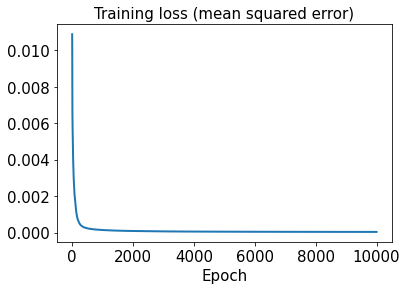

In [28]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

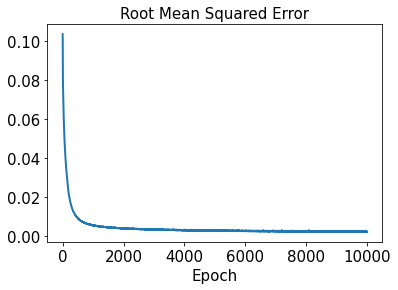

In [29]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [30]:
test_results = sd.evaluate(x_train)

19/19 [==============================] - 0s 2ms/step - loss: 3.3069e-05 - rmse: 0.0000e+00


In [31]:
decoded_train = sd.predict(x_train)

In [32]:
decoded_test = sd.predict(x_test)

In [33]:
error_train_abs = np.abs(decoded_train - y_train)

In [34]:
error_test_abs = np.abs(decoded_test - y_test)

In [35]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00049431267


In [36]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0179615


In [37]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [38]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

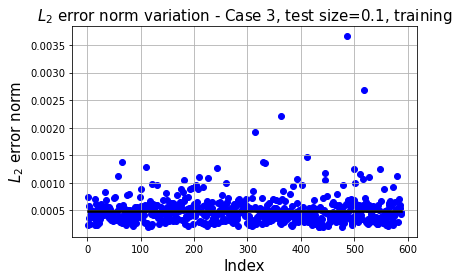

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

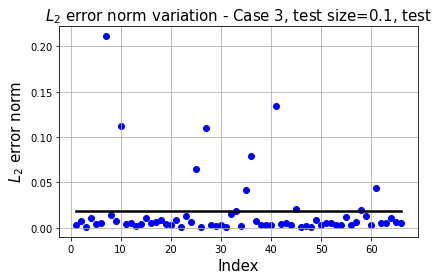

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

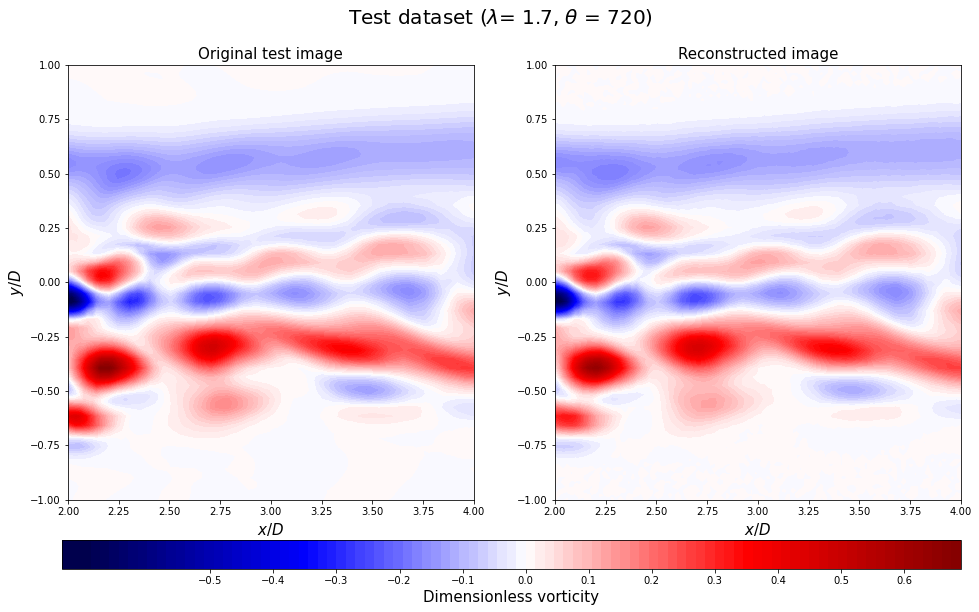

In [41]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

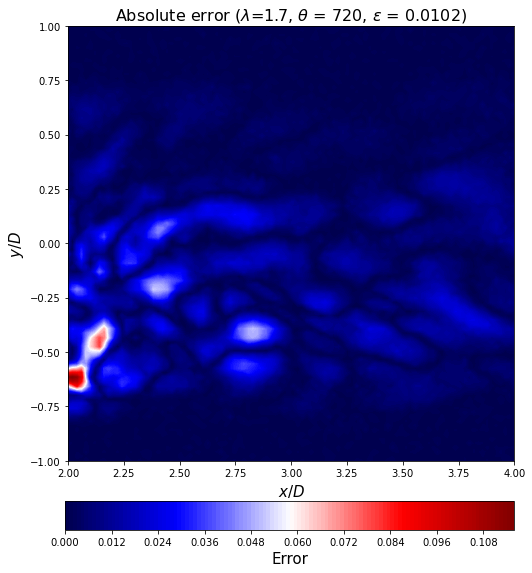

In [42]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()